In [1]:
from datetime import date
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2 

In [2]:
# load custom collection of functions
import sys
sys.path.append('/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/')
import utility_functions as UTIL

In [3]:
parent_directory = "/home/schmiedc/FMP_Docs/Projects/Bioactives_data/"

input_path = parent_directory + "results/"
output_path = input_path

figure_path = parent_directory + "figures/"

# Feature Comparison between cell lines

In [4]:
file_U2OS_Median_type = '/*[0-9]_' + 'FMP_U2OS_norm_reduced_filtered_median.csv'
files_U2OS_Median = glob.glob(input_path + file_U2OS_Median_type)

### gets latest file
max_file_U2OS_Median = max(files_U2OS_Median, key=os.path.getctime)

### load file
data_U2OS_Median = pd.read_csv(max_file_U2OS_Median)
data_U2OS_Median.shape

(1345, 742)

In [5]:
file_HepG2_Median_type = '/*[0-9]_' + 'FMP_HepG2_norm_reduced_filtered_median.csv'
files_HepG2_Median = glob.glob(input_path + file_HepG2_Median_type)

### gets latest file
max_file_HepG2_Median = max(files_HepG2_Median, key=os.path.getctime)

### load file
data_HepG2_Median = pd.read_csv(max_file_HepG2_Median)
data_HepG2_Median.shape

(801, 658)

In [6]:
key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"]
U2OS_feature_df = data_U2OS_Median.drop(columns=key_col)

In [7]:
key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"]
HepG2_feature_df = data_HepG2_Median.drop(columns=key_col)

In [8]:
venn_1 = U2OS_feature_df.columns
venn_2 = HepG2_feature_df.columns
venn_3 = list(set(venn_1) & set(venn_2))

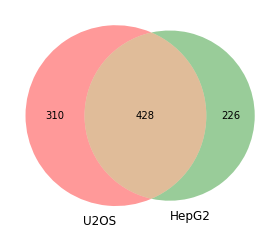

In [9]:

venn2(
    subsets = (len(venn_1) - len(venn_3), 
               len(venn_2) - len(venn_3), 
               len(venn_3)), 
    set_labels = ('U2OS', 'HepG2'))

plt.savefig(figure_path + str(date.today()) + '_FMP_FeatureOverlap.pdf',  dpi=300)
plt.show()

# Compound comparison after filters

In [10]:
venn_1_cpd = data_U2OS_Median["Metadata_EOS"].unique()

In [11]:
venn_2_cpd = data_HepG2_Median["Metadata_EOS"].unique()

In [12]:
venn_3_cpd = list(set(venn_1_cpd) & set(venn_2_cpd ))

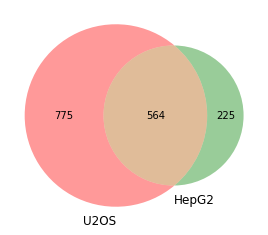

In [13]:
venn2(
    subsets = (len(venn_1_cpd) - len(venn_3_cpd), 
               len(venn_2_cpd) - len(venn_3_cpd), 
               len(venn_3_cpd)), 
    set_labels = ('U2OS', 'HepG2'))

plt.savefig(figure_path + str(date.today()) + '_FMP_CompoundOverlap.pdf',  dpi=300)
plt.show()

# %Pairing

In [14]:
# add a column for cell type
data_U2OS_Median['Metadata_Cell_type'] = 'U2OS'
data_HepG2_Median['Metadata_Cell_type'] = 'HepG2'

# modify Metadata_EOS to include CellType Info
data_U2OS_Median['Metadata_EOS_mod'] = 'U2OS_' + data_U2OS_Median['Metadata_EOS'].astype(str)
data_HepG2_Median['Metadata_EOS_mod'] = 'HepG2_' + data_HepG2_Median['Metadata_EOS'].astype(str)

In [15]:
UTIL.get_featuredata(data_U2OS_Median)

,Nuc_AreaShape_BoundingBoxArea,Nuc_AreaShape_BoundingBoxMinimum_X,Nuc_AreaShape_Compactness,Nuc_AreaShape_Extent,Nuc_AreaShape_FormFactor,Nuc_AreaShape_MinFeretDiameter,Nuc_AreaShape_Orientation,Nuc_AreaShape_Zernike_0_0,Nuc_AreaShape_Zernike_1_1,Nuc_AreaShape_Zernike_3_1,...,Cyto_Texture_InverseDifferenceMoment_DNA_10_01_256,Cyto_Texture_InverseDifferenceMoment_DNA_10_03_256,Cyto_Texture_InverseDifferenceMoment_DNA_3_00_256,Cyto_Texture_InverseDifferenceMoment_DNA_3_01_256,Cyto_Texture_InverseDifferenceMoment_DNA_3_03_256,Cyto_Texture_InverseDifferenceMoment_DNA_5_00_256,Cyto_Texture_InverseDifferenceMoment_ER_10_01_256,Cyto_Texture_InverseDifferenceMoment_ER_5_03_256,Cyto_Texture_InverseDifferenceMoment_Mito_3_02_256,Cyto_Texture_SumAverage_DNA_3_00_256
0,1.440663,0.137165,0.032665,0.383985,-0.031743,0.945128,-0.922458,0.230116,-0.363261,-0.849232,...,0.454941,0.701808,-0.197835,0.067684,0.435924,-0.215480,-5.825556,-5.148229,0.700623,-0.305906
1,-1.117691,-0.654842,-1.214050,0.785816,1.230209,-0.094179,0.919382,0.084490,-0.084183,-0.736096,...,0.380581,0.901834,-0.184844,-0.156313,-0.027029,-0.161276,-6.895279,-8.010751,0.656034,-0.633295
2,0.516064,0.422545,-0.608222,0.431334,0.613920,0.531860,-0.279905,0.025747,-0.413593,-0.058359,...,-0.148488,-0.018259,-0.140854,-0.180894,0.449831,-0.088635,-6.155957,-7.204564,0.324453,0.176756
3,0.479638,-1.041602,0.120032,-0.773869,-0.119307,0.332956,-0.215418,0.812983,0.027583,0.124506,...,1.164191,2.095741,1.275829,0.761223,1.731913,1.017425,-5.340155,-5.854969,0.648607,-1.668410
4,-0.825903,-1.989842,2.551672,-1.588957,-2.521092,-0.492455,0.247237,-1.690293,0.548846,1.480170,...,2.560441,1.898461,2.977098,1.746517,2.424811,1.402149,-4.561538,-4.766277,-0.832318,-2.575370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,-5.940437,-1.154408,-2.597152,1.838084,2.646222,-6.258452,-0.252842,2.335009,-2.027038,-2.759873,...,-0.186774,-0.504228,-0.383892,-1.033565,-1.360566,-1.243480,-7.458249,-8.749268,-1.425795,-0.229327
1341,-3.203831,-0.318979,-3.649772,1.142472,3.718083,-3.745342,0.194710,2.662289,-1.025668,-1.839443,...,-0.779351,-0.502939,-0.389363,-1.020524,-0.582878,-1.101915,-7.581201,-9.513997,-2.420485,0.483885
1342,-5.528179,-0.589292,-3.009349,0.926135,3.063894,-3.850279,0.030385,2.453100,0.152311,-0.782241,...,-0.872124,-0.736734,-0.523877,-0.166548,-0.367597,-1.116832,-8.037041,-11.434007,-2.261589,0.852471
1343,-3.115342,0.177287,-2.797453,1.927819,2.840048,-3.112574,-0.377835,2.721053,-1.294433,-1.838167,...,-2.346639,-2.130821,-1.300297,-1.427095,-1.982340,-1.729525,-10.618737,-11.466515,-2.085251,1.617136


In [16]:
n_samples = 10000

modality_1_df = data_U2OS_Median
modality_2_df = data_HepG2_Median
modality_1_perturbation = "U2OS"
modality_2_perturbation = "HepG2"

signal = UTIL.correlation_between_modalities(modality_1_df,
                                        modality_2_df,
                                        modality_1_perturbation,
                                        modality_2_perturbation,
                                        'Metadata_EOS',
                                        'Metadata_EOS_mod')

In [17]:
null = UTIL.null_correlation_between_modalities(modality_1_df,
                                           modality_2_df,
                                           modality_1_perturbation,
                                           modality_2_perturbation,
                                           'Metadata_EOS',
                                           'Metadata_EOS_mod',
                                           n_samples)

prop_5_95, value_95 = UTIL.percent_score(null, signal, how='right')

In [18]:
perc_95 = np.nanpercentile(null, 95)
perc_95

0.4253629548241003

In [19]:
above_threshold = signal > perc_95

In [20]:
np.mean(above_threshold.astype(float))

0.25886524822695034

In [21]:
corr_df = pd.DataFrame()
corr_df = corr_df.append({'Description': 'U2OS vs. HepG2',
                           'Matching':signal,
                           'Null_Matching':null,
                           'Percent_Matching':'%.1f'%prop_5_95,
                           'Value_95':value_95}, ignore_index=True)

<ipython-input-21-8a0c74ede8da>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'Description': 'U2OS vs. HepG2',


In [22]:
print(corr_df[['Description', 'Percent_Matching']].to_markdown(index=False))

| Description    |   Percent_Matching |
|:---------------|-------------------:|
| U2OS vs. HepG2 |               25.9 |


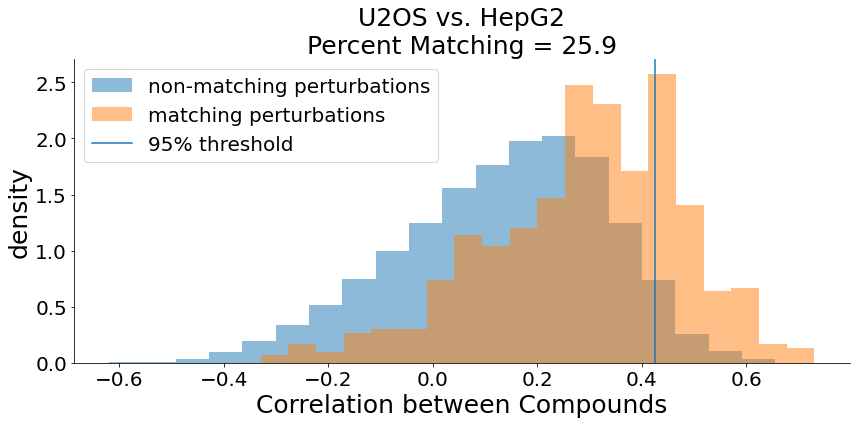

In [23]:
UTIL.distribution_plot(df=corr_df, metric="Percent Matching")

plt.savefig(figure_path + str(date.today()) + "_FMP_U2OS-HepG2_Percent_Pairing.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)